# **Problema 1**


1.- Dos personas han quedado citas en determinado lugar. ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0,30].<br>
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.

## **Solución**

### 1. Identifique las variables 

Tenemos dos serían $t_1$ y  $t_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias 

$t_1 \sim U(0, 30)$ y  $t_2\sim U(0, 30)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Sin perdida de generalidad la diferencia $\left | t_1 -t_2\right |\leq10$ modela adecuadamente el sistema.

Si $\left | t_1 -t_2\right |\leq10$ es el tiempo de espera sea menor o incluso igual a 10 de cualquiera de ellos, si es $\left | t_1 -t_2\right |>10$significa que alguien llego muy tarde, más de 10.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una estimación de la probabilidad de que se encuentren en los 10 minutos de tolerancia.

Una forma de implementarlo es mediante el siguiente código.

In [239]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [240]:
# Función para calcular la diferencia entre t1 y t2
def diferencia():
    # Generar dos variables aleatorias uniformes en el intervalo [0, 30]
    t1 = np.random.uniform(0, 30)
    t2 = np.random.uniform(0, 30)
    
    # Calcular la diferencia entre t1 y t2
    diferencia = t1 - t2
    
    return diferencia


In [241]:
abs(diferencia())

3.525199450319585

### 5. Diseñe el experimento

Para estimar la probabilidad de que la diferencia sea menor incluso igual a 10, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de la diferencia de tiempos.

In [242]:
# Función para estimar la probabilidad de que la diferencia sea menor o igual a 10
def prob_dife(n):
    prob = []  # Lista para almacenar los valores de probabilidad estimados
    dife = 0   # Variable para contar las veces que la diferencia es menor o igual a 10
    
    for i in range(n):
        dif = diferencia()  # Obtener la diferencia entre t1 y t2
        if abs(dif) <= 10:
            dife += 1  # Incrementar el contador si la diferencia es menor o igual a 10
        
        prob.append(dife / (i + 1))  # Calcular la probabilidad y añadirla a la lista
    
    return prob


In [243]:
# Realizar la simulación con  iteraciones
X = prob_dife(1000)

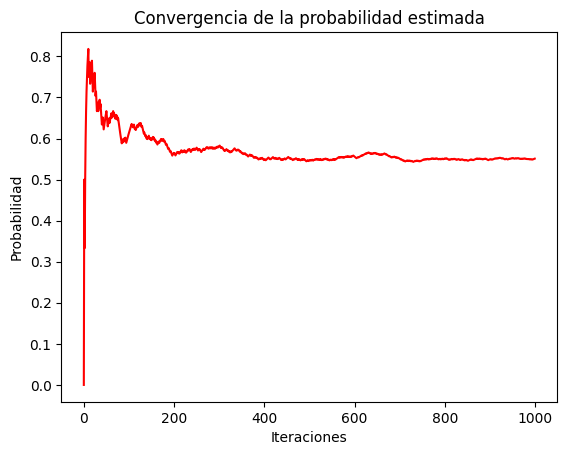

In [244]:
# Graficar los valores de probabilidad
plt.plot(X, color='red')  # Cambiar el color de la línea a rojo
plt.xlabel('Iteraciones')
plt.ylabel('Probabilidad')
plt.title('Convergencia de la probabilidad estimada')
plt.show()


In [245]:
print(np.mean(X), np.std(X))

0.5699444324925396 0.04415560618930137


### 6. Repita el experimento $n$ veces 

Una forma de hacerlo es mediante el siguiente codigo.

In [246]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_dife(1000)
        lista.append(np.mean(s))
    return lista

In [247]:
Y=modelo(1000)

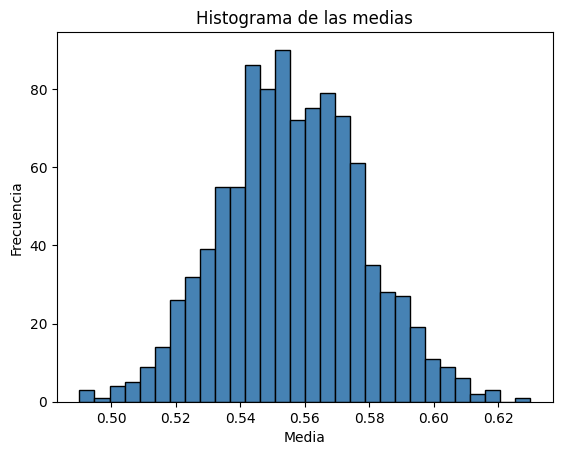

0.5561812457463141 0.021751688382762684


In [248]:
# Configurar el histograma con colores y títulos
plt.hist(Y, bins=30, color='steelblue', edgecolor='black')

# Agregar títulos y etiquetas de ejes
plt.title('Histograma de las medias')
plt.xlabel('Media')
plt.ylabel('Frecuencia')

plt.show()
print(np.mean(Y), np.std(Y))

### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [249]:
print("La Media de Y:", np.mean(Y))

La Media de Y: 0.5561812457463141


In [250]:
print("El Intervalo de confianza es:",(np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)))

El Intervalo de confianza es: (0.5501519853340925, 0.5622105061585357)


### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [251]:
N = (2*np.std(X)*1.96/0.01)**2

In [252]:
print(N)

299.6013988240098


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

###Solución analitica
Sin perdida de generalidad, podemos considerar que la primera persona llega en un momento determinado y luego analizar la probabilidad de que la segunda persona llegue dentro de los siguientes 10 minutos. Para que el tiempo de espera sea como máximo 10 minutos, debemos considerar dos escenarios:

###caso1
Si la primera persona llega en un tiempo $t_1$ dentro del intervalo [0, 20], entonces la segunda persona puede llegar en cualquier momento dentro del intervalo [$t_1$, $t_1+10$]. La probabilidad de esto es $\frac{t_1+10}{30}$, ya que la segunda persona tiene un rango de tiempo más corto para llegar.

###caso2
Si la primera persona llega en un tiempo $t_1$ dentro del intervalo (20, 30], entonces la segunda persona puede llegar en cualquier momento dentro del intervalo [$t_1$, 30]. La probabilidad de esto es $\frac{30 - t_1}{30}$, ya que la segunda persona tiene un rango de tiempo más corto para llegar.

Dado que la primera persona puede llegar en cualquier momento dentro del intervalo [0, 30] con igual probabilidad, debemos calcular la probabilidad promedio considerando ambos escenarios, por probabilidad acumulada se tiene:
>$P(espera\leq10)=\frac{1}{30}\:\int _0^{20}\:\left(\frac{t_1+10}{30}\right)\:dt_1\:+\:\frac{1}{30}\:\int _{20}^{30}\:\left(\frac{30-t_1}{30}\right)\:dt_1$

Al resolver la integral obtengo el valor de $\frac{1}{2}$ como la probabilidad de que el tiempo de espera sea 10.

En la solución analítica del problema, sale que la probabilidad es de 50%, pero en la simulación es de aproximadamente 55%, supongo que es una buena aproximación